In [1]:
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading

In [2]:
cap = cv2.VideoCapture(0)
cap.set(3, 320)  # adjust width
cap.set(4, 240)  # adjust height

True

In [3]:
# Stop button
# =============
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square'  # (FontAwesome names without the 'fa-' prefix)
)

In [4]:
# Display function
# =============
def view(button):
    display_handle = display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        #frame = cv2.flip(frame, 1) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value is True:
            cap.release()
            display_handle.update(None)
            break

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

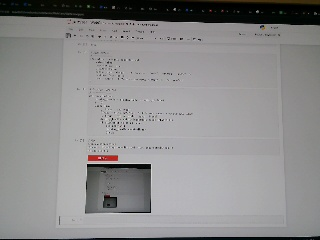

In [5]:
# Run
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()